In [3]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility')
from utilities.brain_specimens.get_prep_list import get_prep_list_excluding_DK52,get_active_prep_list

In [4]:
get_active_prep_list()

['DK39',
 'DK40',
 'DK41',
 'DK43',
 'DK46',
 'DK50',
 'DK52',
 'DK54',
 'DK55',
 'DK60',
 'DK61',
 'DK62']

In [2]:
get_prep_list_excluding_DK52()

['DK39',
 'DK40',
 'DK41',
 'DK43',
 'DK46',
 'DK50',
 'DK54',
 'DK55',
 'DK60',
 'DK61',
 'DK62']

In [2]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility')
from utilities.brain_specimens.get_prep_list import get_prep_list_excluding_DK52
from utilities.brain_specimens.get_com import get_atlas_com,get_beth_com
from utilities.sqlcontroller import SqlController
from utilities.alignment.align_point_sets import align_point_sets
import numpy as np

In [3]:
from utilities.model.center_of_mass import CenterOfMass
from sql_setup import session
def get_coordinate_from_query(query_results):
    coordinates = []
    for entry in query_results:
        coordinates.append([entry.x,entry.y,entry.section])
    return np.array(coordinates)


In [5]:
import matplotlib.pyplot as plt
def get_common_point_set(com1_dict,com2_dict):
    key1 = com1_dict.keys()
    key2 = com2_dict.keys()
    shared_keys = [keyi for keyi in key1 if keyi in key2]
    com1 = []
    com2 = []
    for key in shared_keys:
        com1.append(com1_dict[key])
        com2.append(com2_dict[key])
    com1 = np.array(com1)
    com2 = np.array(com2)
    return com1,com2

def print_two_point_set(pointset1,pointset2):
    assert len(pointset1)==len(pointset2)
    for pointi in range(len(pointset1)):
        print(pointset1[pointi],pointset2[pointi])

def scatter_two_com_array(com1,com2):
    plt.scatter(com1[:,0],com1[:,1])
    plt.scatter(com2[:,0],com2[:,1])

def scatter_two_com_dict(com1_dict,com2_dict):
    com1,com2 = get_common_point_set(com1_dict,com2_dict)
    print((com1.shape,com2.shape))
    plt.scatter(com1[:,0],com1[:,1])
    plt.scatter(com2[:,0],com2[:,1])

In [27]:
prep_list_excluding_DK52 = get_prep_list_excluding_DK52()

In [62]:
prepi = prep_list_excluding_DK52[0]
coms_dict = get_beth_com("DK52")
atlas_coms_dict = get_atlas_com()

In [63]:
com,atlas_com = get_common_point_set(coms_dict,atlas_coms_dict)
com = com*np.array([0.325,0.325,20])
atlas_com = (atlas_com*10/np.array([10,10,20])+np.array([500,500,150]))*np.array([10,10,20])

In [64]:
print_two_point_set(com,atlas_com)

[14818.7  6025.5  4680. ] [6972.27  5670.988 2980.   ]
[12598.625  6353.1    3440.   ] [4567.992  5020.7948 1640.    ]
[11110.45   6490.575  6440.   ] [3018.75  4776.826 4410.   ]
[11068.85   6720.675  3460.   ] [3018.75  4776.826 1590.   ]
[12722.125  7913.425  4460.   ] [4272.079 6202.24  2490.   ]
[12786.15  7792.2   5520.  ] [4272.079 6202.24  3510.   ]
[11362.325  5292.625  4640.   ] [3645.55 3915.06 2860.  ]
[11293.425  5275.075  4860.   ] [3645.55 3915.06 3140.  ]
[14857.05   5747.625  4940.   ] [7033.41  5479.286 3290.   ]
[14801.15   5770.375  4360.   ] [7033.41  5479.286 2710.   ]
[11780.275  5218.2    4940.   ] [3994.41 3961.04 3250.  ]
[11780.275  5209.75   4460.   ] [3994.41 3961.04 2750.  ]
[15011.75   5513.625  4600.   ] [7023.06  5256.525 3020.   ]
[14330.55  7122.05  3440.  ] [6124.4  6038.26 1770.  ]
[12082.2    3091.075  4440.   ] [4967.529 2516.93  3000.   ]
[12978.55   5275.725  5560.   ] [4961.9734 4428.079  3840.    ]
[12937.6    5505.175  3760.   ] [4961.9734 44

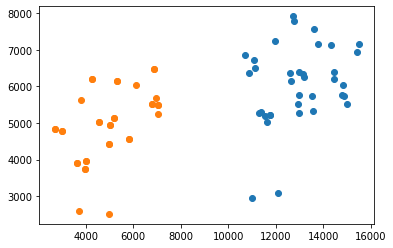

In [65]:
scatter_two_com_array(com,atlas_com)

In [68]:
a2c_rot,a2c_trans = align_point_sets(atlas_com.T,com.T)

In [70]:
a2c_rot,a2c_trans

(array([[ 1.00142856,  0.28670416,  0.03226724],
        [-0.28185535,  0.9970747 , -0.11179984],
        [-0.06162803,  0.09870342,  1.03564435]]),
 array([[6438.79890391],
        [2842.52514905],
        [1480.61079409]]))

In [69]:
c2a_rot,c2a_trans = align_point_sets(com.T,atlas_com.T)

In [71]:
c2a_rot,c2a_trans

(array([[ 0.89960903, -0.25319791, -0.05536204],
        [ 0.25755372,  0.89569785,  0.08866782],
        [ 0.02898649, -0.10043267,  0.93034596]]),
 array([[-4869.80697574],
        [-4215.44619736],
        [-1206.4877145 ]]))

In [73]:
np.linalg.inv(a2c_rot)-c2a_rot

array([[ 0.02243214, -0.0063136 , -0.00138048],
       [ 0.00642221,  0.02233462,  0.00221097],
       [ 0.00072279, -0.00250433,  0.02319858]])

In [74]:
a2c_rot - c2a_rot

array([[ 0.10181953,  0.53990207,  0.08762929],
       [-0.53940907,  0.10137685, -0.20046766],
       [-0.09061452,  0.19913609,  0.10529839]])